<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB43_A05_Bernstein_Vazirani_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Berat Yenilen, Utku Birkan, Arda Çınar, Cenk Tüysüz and Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b> Bernstein-Vazirani Algorithm </b></font>
<br>
<br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

SolutionToTask1 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1MTX2WFOGUCtrfPqbDTQJtY4y9YZziB3c?usp=sharing#scrollTo=4sVb8ypg2jTt' if in_colab() else 'QB43_A05_Bernstein_Vazirani_Algorithm_Solutions.ipynb#task1')))
SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1MTX2WFOGUCtrfPqbDTQJtY4y9YZziB3c?usp=sharing#scrollTo=5jAJgEjQ2jTu' if in_colab() else 'QB43_A05_Bernstein_Vazirani_Algorithm_Solutions.ipynb#task2')))
SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1MTX2WFOGUCtrfPqbDTQJtY4y9YZziB3c?usp=sharing#scrollTo=1AEo8L0F2jTu' if in_colab() else 'QB43_A05_Bernstein_Vazirani_Algorithm_Solutions.ipynb#task3')))
SolutionToTask4 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1MTX2WFOGUCtrfPqbDTQJtY4y9YZziB3c?usp=sharing#scrollTo=EE4d-Yhw2jTu' if in_colab() else 'QB43_A05_Bernstein_Vazirani_Algorithm_Solutions.ipynb#task4')))

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py"
    !wget --no-cache -O oracle.py {url}

    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

--2025-07-14 14:16:16--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3128 (3.1K) [text/plain]
Saving to: ‘oracle.py’

oracle.py           100%[===================>]   3.05K  --.-KB/s    in 0s      

2025-07-14 14:16:16 (27.2 MB/s) - ‘oracle.py’ saved [3128/3128]



##### Let $x \cdot s$ represent the inner product of the bit strings modulo 2.

For instance if $x = 1000$ and $s = 1010$, then $x\cdot s = 1\cdot 1 + 0\cdot 0 + 0\cdot 1 + 0 \cdot0 = 1 \pmod 2 = 1$

## Problem

Given an oracle function $f:\{0,1\}^n \rightarrow \{0,1\}$, which is defined as $ f(\mathbf{x}) = x \cdot s $, find the secret string (sequence of bits) $s$.


This might come across as a bit of an artificially created problem, because it is. It was specifically designed to be solved using a quantum computer in order to show there can be advantages in using quantum algorithms over probabilistic algorithms.

Let's start by giving an example of such an $f$.

\begin{align*}
	f(00)&=0\\
	f(01)&=1\\
	f(10)&=0\\
	f(11)&=1\\
	\end{align*}
    
In this example, $s$ is $01$, as $f(00)=00\cdot 01=0$, $f(01)=01\cdot 01 = 1$, $f(10)=10\cdot01=0$ and $f(11)=11\cdot01=1$.
    
  

Note that now the unitary operator $U_f$ takes the following form: $ U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus ( x \cdot s)} $.



### Task 1

- Using how many queries can you solve the problem clasically? How many queries if you use a probabilistic algorithm?
- How many queries do you think we need to make if we are to solve the problem with a quantum computer?

To check out our solution, run the next cell:

In [2]:
SolutionToTask1()  # show solution for task 1

<IPython.core.display.Javascript object>

### Task 2

What can we say about the $f:\{0,1\}^n \rightarrow \{0,1\}$ function if $s = 0^n$?

To check out our solution, run the next cell:

In [ ]:
SolutionToTask2()  # show solution for task 2

## Algorithm

We use exactly the same algorithm as Deutsch-Jozsa.

 <img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch4/deutschjozsa.png" width="60%" align="center">

We construct a circuit with $n+1$ qubits.

- Set the $n+1$'st qubit to state $\ket{-}$ by applying $X$ and $H$ gates.
- Apply $H$ to first $n$ qubits.
- Apply $U_f$.
- Apply $H$ to first $n$ qubits.
- Measure the first $n$ qubits to obtain $s$.

## Analysis

 <img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch4/deutschjozsa2.png" width="60%" align="center">

As we have the same circuit as Deustch-Jozsa, the initialization is the same.

$$ \ket{\psi_2} = \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} \ket{x} \otimes \ket{-} $$

From now on we can ignore the output qubit and focus on our input qubits. After applying $U_f$ we then get the state:

$$ \ket{\psi_{3,0}}= \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} \ket{x} $$

Let's replace $f(x) = x \cdot s$, and rewrite our state as follows:

$$ \ket{\psi_{3,0}} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{x \cdot s} \ket{x} $$

From the previous notebook we know the following expression: $$ H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{x \cdot z} \ket{z}. $$

We also know that the $H^{\otimes n}$ operator is its own inverse. Thus, we can say that $H^{\otimes n}\ket{a} = \ket{b} \Longleftrightarrow H^{\otimes n}\ket{b} = \ket{a}$. So in fact, $\ket{\psi_3}$ is the state obtained after applying $H^{\otimes n}$ to $\ket{s}$.

Hence after applying $H^{\otimes n}$ to the input qubits, we get the final state as

$$\ket{\psi_{4,0}} = \ket{s}.$$

We measure the first $n$ qubits and we observe the string $s$ with probability 1.

Note that this is also an exact algorithm without any errors like the other algorithms we have seen so far.

### Task 3

Given an oracle function `bv_oracle()` that constructs a 6 qubit oracle circuit ($s$ has length 5) for $f$, construct a circuit that implements the algorithm described above to find out $s$.

Note that qubit 5 is the output qubit.

Run the following cell to load function `bv_oracle()`.

In [3]:
quantum_file = path_files+"oracle.py"
%run $quantum_file

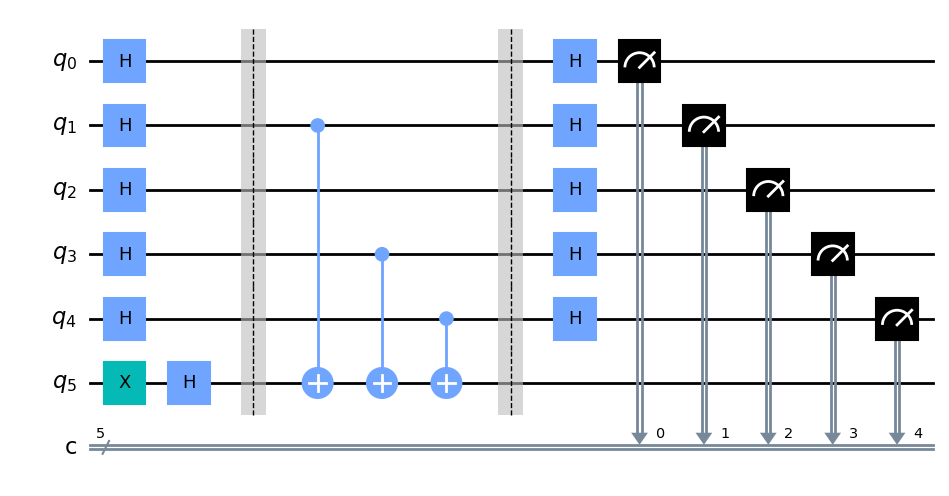

In [4]:
from qiskit import QuantumCircuit, execute, Aer

n=5

#Create quantum circuit
bv_circuit = QuantumCircuit(n+1, n)

#Your code here
bv_circuit.x(n)
bv_circuit.h(range(n + 1))
bv_circuit.compose(bv_oracle(), inplace = True)
bv_circuit.h(range(n))
bv_circuit.measure(range(n), range(n))

bv_circuit.draw(output="mpl")

In [5]:
job = execute(bv_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'11010': 10000}


To check out our solution, run the next cell:

In [ ]:
SolutionToTask3()  # show solution for task 3

### Task 4

Given $\textbf{s} = 0110$, implement a function that returns an oracle for the function  $ f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{s} $. Note that $n=4$ and you will need a cirucit with 5 qubits where qubit 4 is the output qubit.

In [6]:
from qiskit import QuantumCircuit

def oracle():

    #Your code here
    oracle_circuit = QuantumCircuit(5)
    oracle_circuit.barrier()
    oracle_circuit.cx(1, 4)
    oracle_circuit.cx(2, 4)
    oracle_circuit.barrier()
    return oracle_circuit

To check out our solution, run the next cell:

In [ ]:
SolutionToTask4()  # show solution for task 4

Recall from Task 1 that we need at least $n$ queries both using the deterministic and probabilistic approaches. Now finally, we have an algorithm which provides speedup in the query model also against probabilistic algorithms, although not exponential.